In [79]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [80]:
samples = 100
data_x_values = np.random.uniform(0,2*math.pi, samples).astype(np.float32)
data_y_values = np.sin(data_x_values).astype(np.float32)

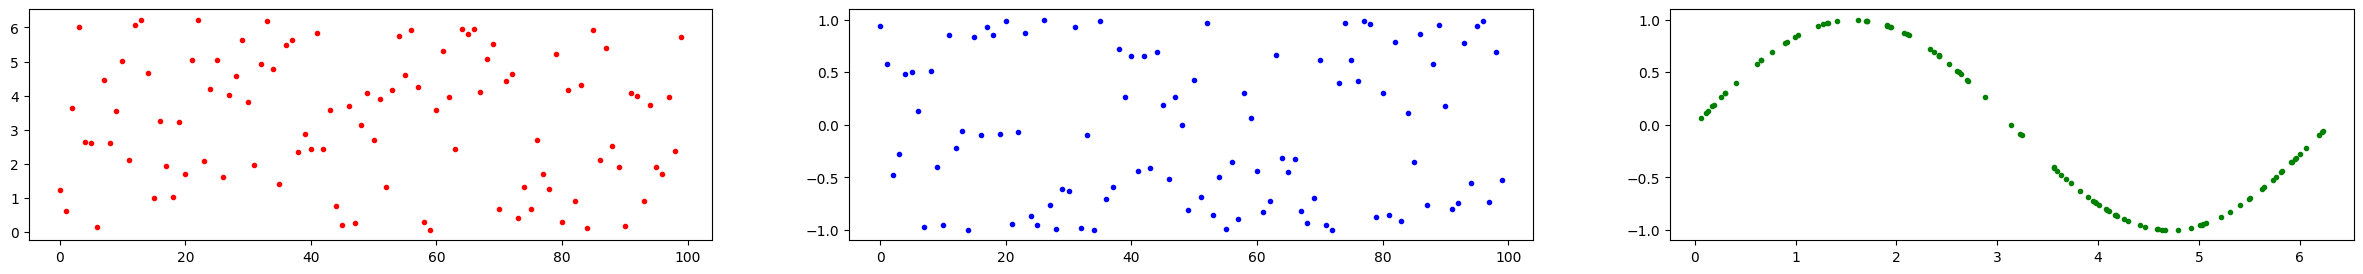

In [81]:
plotter = plt.figure(figsize=(30,3))

plot_x = plotter.add_subplot(131)
plot_y = plotter.add_subplot(132)
plot_xy = plotter.add_subplot(133)
plot_x.plot(data_x_values,'r.')
plot_y.plot(data_y_values,'b.')
plot_xy.plot(data_x_values,data_y_values,'g.')

## Data splitting and noise addition

## Noise Addition

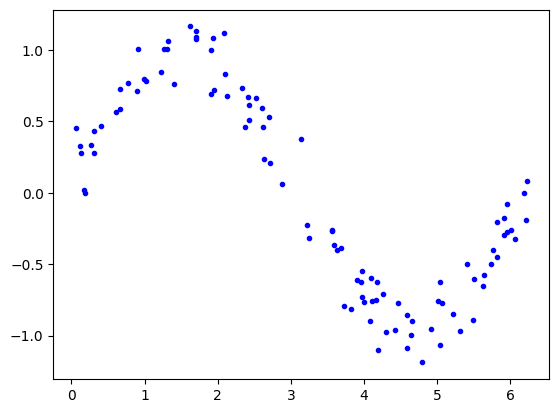

In [82]:
data_y_values = data_y_values + 0.15*np.random.randn(*data_y_values.shape)
plt.plot(data_x_values, data_y_values, 'b.')

## Splitting data

In [83]:
training_data_split = int(0.6*samples)
test_val_data_split = int(0.2 * samples + training_data_split)

x_train, x_test, x_validate = np.split(data_x_values , [training_data_split,test_val_data_split])
y_train, y_test, y_validate = np.split(data_y_values , [training_data_split,test_val_data_split])


In [84]:
print(x_train.shape, x_test.shape, x_validate.shape)

(60,) (20,) (20,)


Text(0.5, 1.0, 'Validate bestribution')

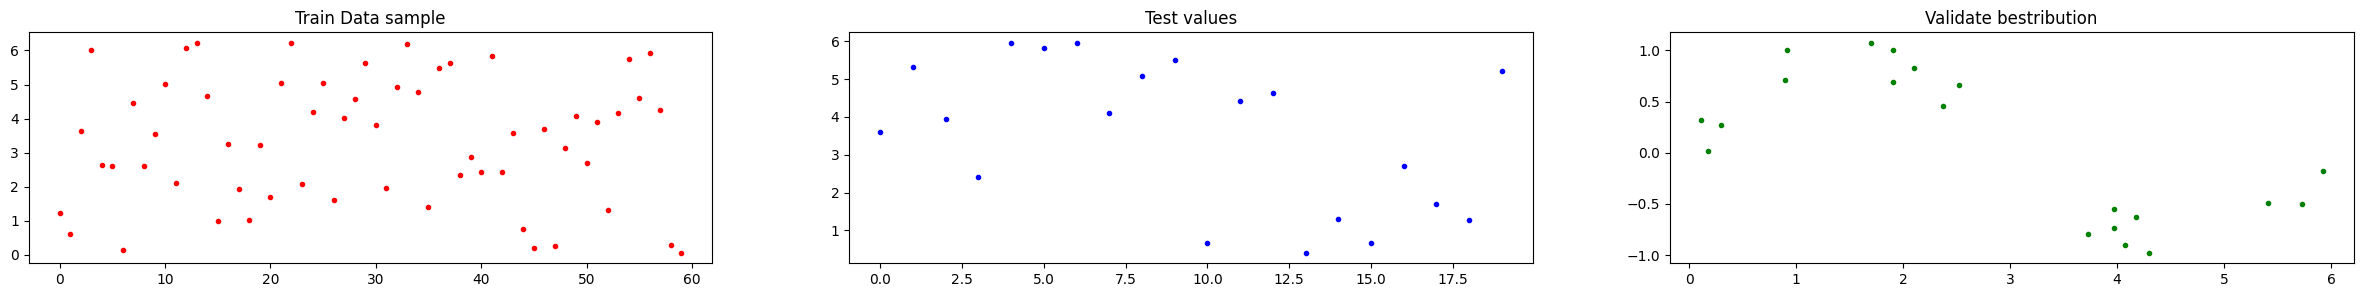

In [85]:
plotter_splitter = plt.figure(figsize=(30,3))

plot_x = plotter_splitter.add_subplot(131)
plot_y = plotter_splitter.add_subplot(132)
plot_xy = plotter_splitter.add_subplot(133)
plot_x.plot(x_train,'r.')
plot_y.plot(x_test,'b.')
plot_xy.plot(x_validate,y_validate,'g.')
plot_x.set_title("Train Data sample")
plot_y.set_title("Test values")
plot_xy.set_title("Validate bestribution")
